This template:
auto-detects numerical features
checks distribution, skewness, outliers
visualizes correlations
compares features vs target (optional)
prints interpretations where needed

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")
sns.set_palette("deep")
print("📌 Numerical EDA Template Loaded")


📌 Numerical EDA Template Loaded


In [ ]:
df = pd.read_csv(r"C:\Users\WELCOME\Desktop\MLPROJECTS\notebook\data\stud.csv")
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (1000, 8)


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [16]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Features:", list(num_cols))

Numerical Features: ['math_score', 'reading_score', 'writing_score', 'total_score', 'average']


In [6]:
df[num_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
math_score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading_score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing_score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


Focus on:
min/max sanity
std spread
weird values
missing behavior

In [7]:
missing = df[num_cols].isna().sum()

missing = missing[missing > 0].sort_values(ascending=False)
missing


Series([], dtype: int64)

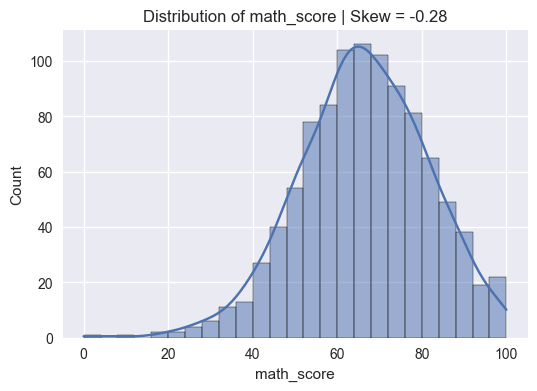

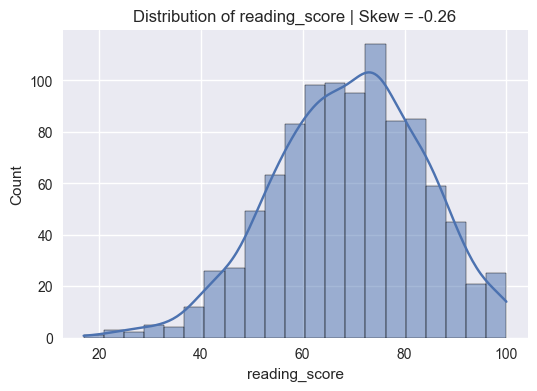

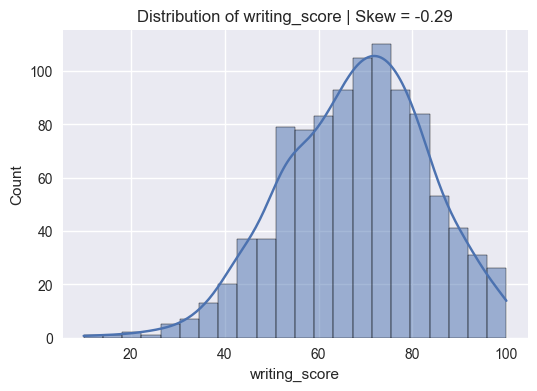

In [8]:
# Distribution + KDE + Skewness (Auto Loop)
from scipy.stats import skew

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col} | Skew = {round(skew(df[col].dropna()),2)}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


Interpret skewness mentally:
+1 → right-skewed → consider log transform
< −1 → left-skewed
near 0 → symmetric

In [ ]:
#box plot
for col in num_cols:
    plt.figure(figsize=(6,2.5))
    sns.boxplot(x=df[col])
    plt.title(f"Outliers in {col}")
    plt.xlabel(col)
    plt.show()


Look for
extreme tails,
clipped spikes,
impossible values

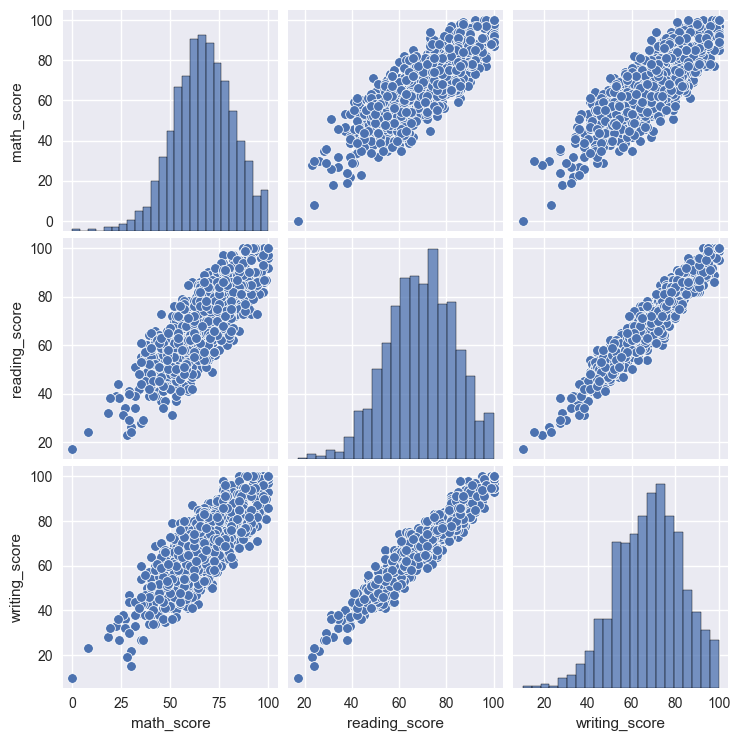

In [10]:
# Pairplot (Quick Multivariate Sanity Check)
sns.pairplot(df[num_cols])
plt.show()

Helps detect:

clusters,

collinearity patterns,

data segments

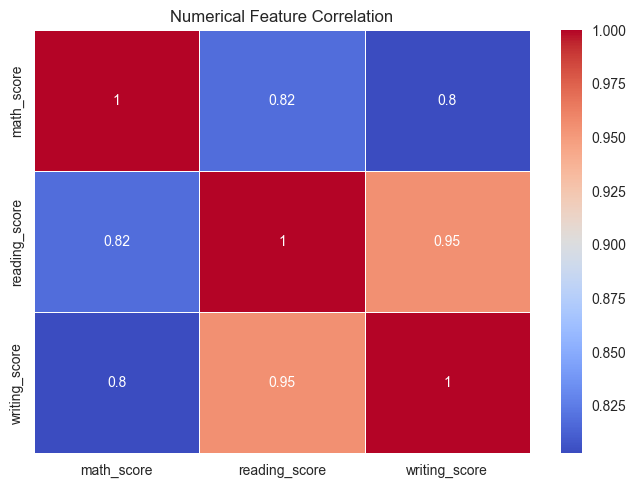

In [11]:
# Correlation Heatmap
corr=df[num_cols].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm',linewidths=0.5)
plt.title("Numerical Feature Correlation")
plt.show()

Practical interpretation:
0.8 = redundant features
negative correlation = inverse relationship
cluster blocks = feature groups

In [13]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


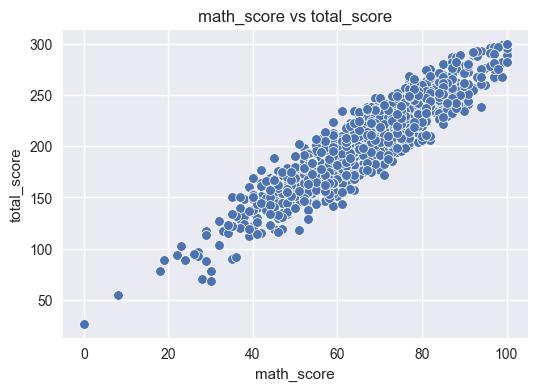

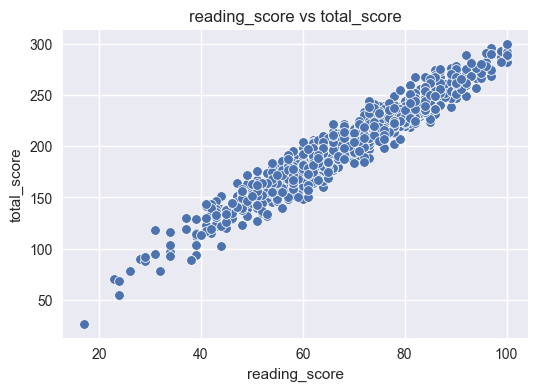

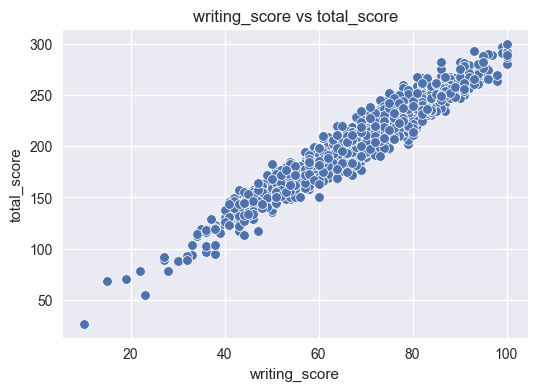

In [14]:
# Feature vs Target (Optional)
target = "total_score"
for col in num_cols:
    if col != target:
        plt.figure(figsize=(6,4))
        sns.scatterplot(x=df[col], y=df[target])
        plt.title(f"{col} vs {target}")
        plt.show()


linear trends → regression friendly
curves → polynomial / tree models
random scatter → feature unhelpful

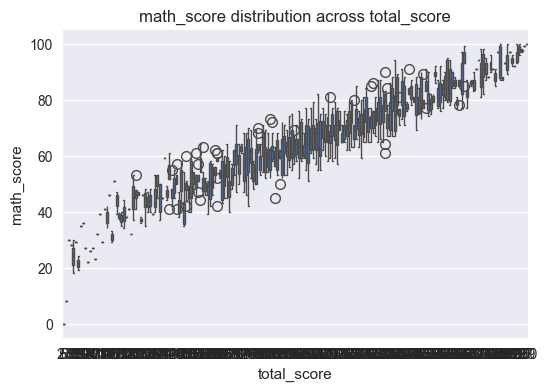

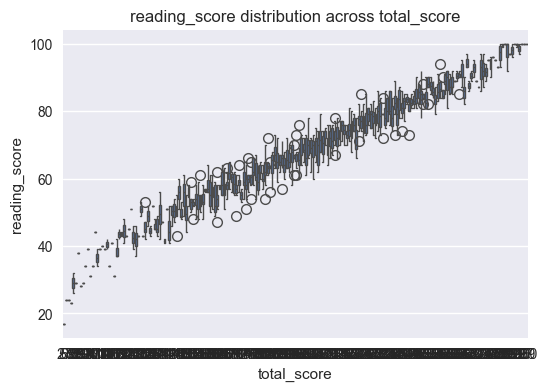

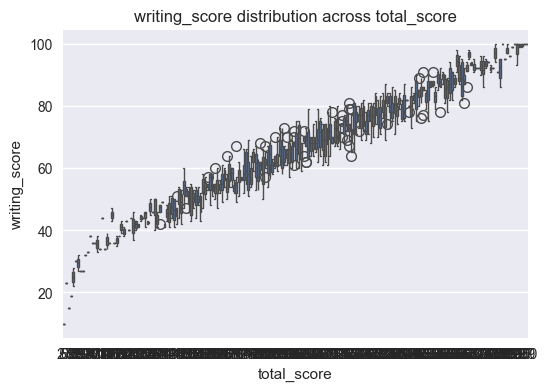

In [15]:
# Boxplot vs Target (Classification)
for col in num_cols:
    if col != target:
        plt.figure(figsize=(6,4))
        sns.boxplot(x=df[target], y=df[col])
        plt.title(f"{col} distribution across {target}")
        plt.show()


Check separation:
clear gaps = strong feature
heavy overlap = weak signal

This EDA answers:

✔ Is data clean & usable?
✔ Are numerical features skewed?
✔ Where are outliers & extremes?
✔ Which features correlate strongly?
✔ Are there redundant features?
✔ Do features relate to target?

KEEP when:
feature shows clear relationship
distribution is meaningful
stable across groups
not redundant
no leakage risk

🔧 TRANSFORM when:
heavily skewed
outlier-sensitive
scale-dependent
non-linear
Useful transforms:
log
sqrt
standard scaling
winsorization

✂️ GROUP / MERGE when:
too many rare categories
multimodal continuous distributions
bucketed features improve stability

🗑️ DROP when
too much missing data
random / noisy / unstable
highly correlated duplicate
derived from target (leakage)
acts like identifier